In [10]:
from onetwogo import Params
from onetwogo.parallel_simulation import ParallelSimulation
from onetwogo.experiment_simulation import ExperimentSimulation
from onetwogo.plot import SimulationPlot
from onetwogo.plot import BehavioralPlot

import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pickle

import parameter_tuning as pt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
sns.set_style("white", {'font.family':'sans-serif', 
               'font.sans-serif':['CMU Serif'],
               'size': 11})

In [12]:
PARAMS_DICT = {'Wui': 6,
              'Wuv': 6,
              'Wvi': 6,
              'Wvu': 6,
              'dt': 10,
              'tau': 100,
              'th': 0.1,
              'IF': -500,
              'uinit': 0.7,
              'vinit': 0.2,
              'yinit': 0.5,
              'Iinit': 1.02,
              'first_duration': 750, 
              'sigma': 0.01, 
              'ntrials': 500,
              'delay': 500}

In [13]:
stimulus_range_s = [400, 450, 500, 550, 600, 650, 700]
stimulus_range_l = [700, 750, 800, 850, 900, 950, 1000]

In [14]:
stimulus_lst_short = np.loadtxt('stimlst_short_400_700_7_a.txt', dtype=int)
stimulus_lst_long = np.loadtxt('stimlst_long_700_1000_7_a.txt', dtype=int)

In [15]:
K_lst = np.arange(1, 18, 0.5)
tau = np.arange(60, 150, 10)

print(len(K_lst), len(tau))

34 9


In [16]:
path = '../results/intermediateI/'
short_ktau065, long_ktau065 = pt.load_data(path+'SHORT_K2-18TAU_th065_del700_sig02_fix_seed-20220727-123837-output.pickle',
                                      path+'LONG_K2-18TAU_th065_del700_sig02_fix_seed-20220727-131437-output.pickle')
short_ktau07, long_ktau07 = pt.load_data(path+'SHORT_K2-18TAU_th07_del700_sig02_fix_seed-20220721-142843-output.pickle', 
                                      path+'LONG_K2-18TAU_th07_del700_sig02_fix_seed-20220721-141802-output.pickle')
short_ktau075, long_ktau075 = pt.load_data(path+'SHORT_K2-18TAU_th075_del700_sig02_fix_seed-20220727-135647-output.pickle', 
                                      path+'LONG_K2-18TAU_th075_del700_sig02_fix_seed-20220727-134119-output.pickle')

threshold 0.75
-18132.02694877189 9070.892965574652


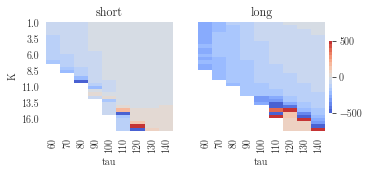

threshold 0.7
-6787.037521142813 3410.64784064067


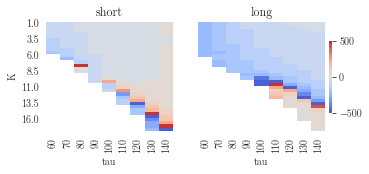

threshold 0.65
-16448.412225513493 32940.64559699417


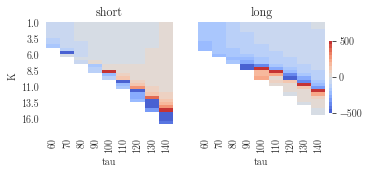

In [17]:
print('threshold', 0.75)
pt.plot_ind_point(short_ktau075, long_ktau075, K_lst, tau)
print('threshold', 0.7)
pt.plot_ind_point(short_ktau07, long_ktau07, K_lst, tau)
print('threshold', 0.65)
pt.plot_ind_point(short_ktau065, long_ktau065, K_lst, tau)

threshold 0.75
-0.37530969419635796 1.20963144485069


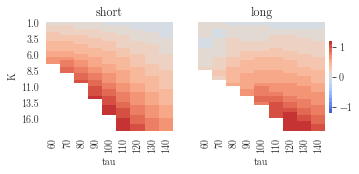

threshold 0.7
-0.4514171304550383 1.3650564680526647


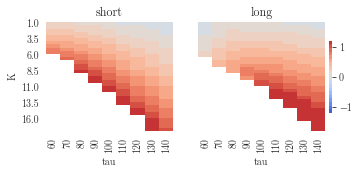

threshold 0.65
-0.46339754842926517 1.4505708361026972


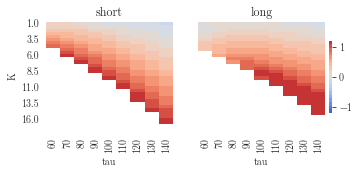

In [18]:
print('threshold', 0.75)
pt.plot_slope(short_ktau075, long_ktau075, K_lst, tau)
print('threshold', 0.7)
pt.plot_slope(short_ktau07, long_ktau07, K_lst, tau)
print('threshold', 0.65)
pt.plot_slope(short_ktau065, long_ktau065, K_lst, tau)